In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
#data set ini terdiri dari beberapa variabel prediktor medis dan satu variabel Target, Outcome. 
#Variabel prediktor meliputi jumlah kehamilan yang dialami pasien, BMI, kadar insulin, usia, dan sebagainya.

In [3]:
#Memuat dataset yang akan dimasukkan
df = pd.read_csv('C:/Users/ACER/Downloads/diabetes.csv')

In [4]:
#Membaca dataset menggunakan fungsi head untuk menampilkan lima catatan pertama dari dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#pada kolom Outcome, kita dapat mengidentifikasi kondisi khusus apakah bernilai benar atau salah (true or false).
# 1 artinya Benar, orang tersebut menderita diabetes.
# 0 artinya Salah, orang tersebut tidak menderita diabetes.

In [8]:
#data conditioning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Menunjukkan bawah terdapat 768 baris dan tidak terdapat nilai nol karena semua baris memiliki nilai

In [6]:
# apabila ditemukan missing values,maka hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [12]:
#menetapkan nilai ke fitur sebagai X dan target Y
# disini akan dihapus kolom 'Outcome' dan menyimpan hasilnya ke dalam DataFrame baru dengan menggunakan axis=1
x=df.drop(['Outcome'],axis = 1)

In [13]:
#menampilkan dataset 
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
#selanjutnya mengakses kolom outcome dari DataFrame dan menyimpan isinya dalam variabel y
y= df['Outcome']

In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
#Membagi data menjadi Train dan Test set
# 70% Training dan 30% Test
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.3 , random_state=1)

In [ ]:
#x_train digunakan untuk melatih model machine learning
#x_test akan digunakan untuk menguji model machine learning
#'x' berisi fitur kolom seperti  jumlah kehamilan yang dialami pasien, BMI, kadar insulin, usia, dan sebagainya.
#'y' berisi kolom outcome

In [19]:
#mengetahui dimensi atau ukuran dari df dalam bentuk (baris,kolom)
x_train.shape

(537, 8)

In [21]:
x_test.shape

(231, 8)

In [22]:
#Membuat model Decision Tree
model= DecisionTreeClassifier(random_state=1)

In [25]:
#melatih model
#memulai proses pelatihan model dengan menggunakan data fitur (x_train) dan label target (y_train).
#untuk menemukan pola atau hubungan antara fitur dan label
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [24]:
#prediksi dengan data uji
y_pred = model.predict (x_test)

In [26]:
#evaluasi model 
accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy : {accuracy}')
print ('Classification Report :')
print (classification_report (y_test, y_pred))
print ('Confusion Matrix :')
print (confusion_matrix (y_test, y_pred))

Accuracy : 0.6883116883116883
Classification Report :
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       146
           1       0.59      0.51      0.54        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231

Confusion Matrix :
[[116  30]
 [ 42  43]]


In [30]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
#Memeriksa apakah seseorang terkena diabates atau tidak
if model.predict([[1, 85, 66, 29, 0, 26.6, 0.351,31]]) [0] == 1 :
    print ('Menderita Diabetes')
else :
    print ('Tidak Menderita Diabetes')

 Tidak Menderita Diabetes


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


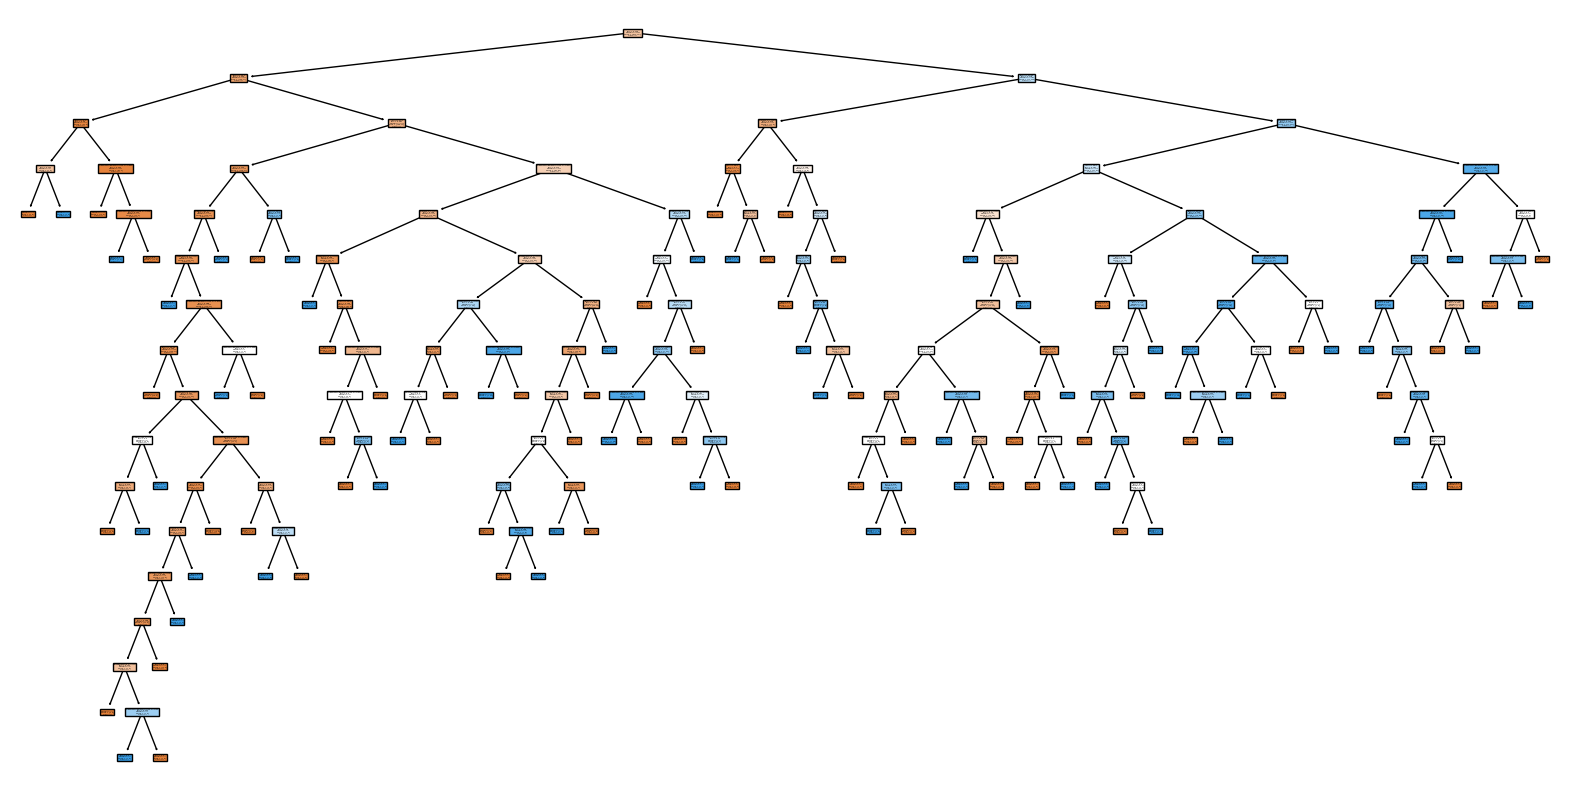

In [34]:
#Visualisasi Decision Tree
plt.figure(figsize = (20,10))
tree.plot_tree (model, feature_names = x.columns, class_names = [str (i) for i in sorted (y.unique ())], filled =True)
plt.show ()